# Explore loss functions over probability distributions

In [24]:
from __future__ import print_function
from __future__ import division
from prettytable import PrettyTable
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import IPython
from IPython.display import display
%matplotlib inline

## Generate data

In [25]:
def gen_random_prob(dim):
    random_vals = np.random.random(dim)
    return random_vals / (np.sum(random_vals))

In [27]:
def gen_random_1hot(dim):
    onehotv = np.zeros(dim)
    onehotv[np.random.choice(range(dim),1)[0]] = 1
    return onehotv

## cross-entropy

In [54]:
def cross_entropy(p, q):
    # Check if q has a zero value where p is non zero
    dim = p.shape[0]
    non_zero_indices = np.logical_and((p > 0),(q > 0))
    if np.sum(non_zero_indices) == 0:
        print("p non-zero, with q zero, log will fail")
    else:
        inter_med = -1 * (p[non_zero_indices] * np.log(q[non_zero_indices]))
        return np.sum(inter_med)

## test case

In [55]:
p = gen_random_1hot(5)
q = gen_random_1hot(5)
print(p,q)
print(cross_entropy(p,q))
p = gen_random_prob(5)
q = gen_random_prob(5)
print(p,q)
print(cross_entropy(p,q))

[ 0.  1.  0.  0.  0.] [ 0.  1.  0.  0.  0.]
0.0
[ 0.28316348  0.12333152  0.01534195  0.11426098  0.46390207] [ 0.40325515  0.38210204  0.03423576  0.10963055  0.07077651]
1.90869781326


## Example

cross-entropy: 2.425
reverse cross-entropy: 2.402


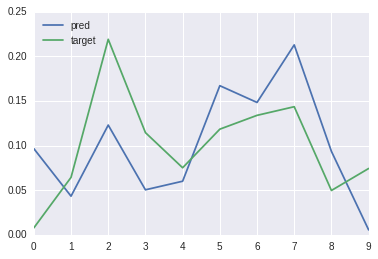

In [59]:
dim = 10
targetprob = gen_random_prob(dim)
predprob = gen_random_prob(dim)

plt.plot(range(dim), predprob, label="pred")
plt.plot(range(dim), targetprob, label="target")
plt.legend(loc='upper left')
ce = cross_entropy(targetprob, predprob)
rce = cross_entropy(predprob, targetprob)
print("cross-entropy: %.3f" % ("na" if not ce else ce))
print("reverse cross-entropy: %.3f" % ("na" if not rce else rce))